# Bank Customer Attrition


In [1]:
# Importing the function

import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
#from ydata_profiling import ProfileReport-----this can be used for fast overview of dataset
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE  #synthetic minority over sampling technique 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OrdinalEncoder

In [2]:
# loading the dataset to panda dataframe
df=pd.read_csv("Bank-Customer-Attrition-Insights-Data.csv")

In [3]:
df.shape

(10000, 18)

In [4]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
3185,3186,15812356,Doherty,652,Germany,Female,45,9,110827.49,1,1,1,153383.54,1,1,3,PLATINUM,510
5232,5233,15787174,Sergeyev,559,France,Female,46,5,0.00,1,1,0,21006.10,1,1,1,DIAMOND,486
5424,5425,15566111,Estes,580,Germany,Male,44,9,143391.07,1,0,0,146891.07,1,1,4,GOLD,567
4803,4804,15776558,Nicholls,802,Spain,Male,41,5,0.00,2,1,1,134626.30,0,0,2,PLATINUM,349
5913,5914,15655961,Palermo,679,Spain,Male,42,2,0.00,1,1,1,168294.27,0,0,2,GOLD,501
9319,9320,15759456,Lupton,529,France,Female,27,1,0.00,2,1,1,37769.98,0,0,5,PLATINUM,333
8306,8307,15633854,Sun,770,France,Female,33,4,0.00,1,1,0,26080.54,1,1,4,DIAMOND,577
9434,9435,15568429,Mitchell,638,Spain,Female,34,7,0.00,2,0,0,3946.29,0,0,2,PLATINUM,504
5031,5032,15706552,Odinakachukwu,769,Germany,Female,34,7,137239.17,1,1,1,71379.92,1,1,2,SILVER,485
4678,4679,15718064,Chia,580,Spain,Male,61,8,125921.37,1,1,1,94677.83,0,0,5,DIAMOND,700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
# removing the unwanted columns
df=df.drop(columns=["RowNumber","CustomerId","Surname","Geography"])

In [7]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [16]:
# printing the unique values from each columns 
vec=["CreditScore","Point Earned"]
for col in df.columns:
    if col not in vec:
      print(col,df[col].unique())
      print("*"*50)

Gender ['Female' 'Male']
**************************************************
Age [42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
**************************************************
Tenure [ 2  1  8  7  4  6  3 10  5  9  0]
**************************************************
Balance [     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
**************************************************
NumOfProducts [1 3 2 4]
**************************************************
HasCrCard [1 0]
**************************************************
IsActiveMember [1 0]
**************************************************
EstimatedSalary [101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
**************************************************
Exited [1 0]
**************************************************
Complain [1 0]
***********

In [13]:
# checking for null values
df.isnull().sum()  # no null values

CreditScore           0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [17]:
# checking the class distribution of target column
print(df["Exited"].value_counts())

Exited
0    7962
1    2038
Name: count, dtype: int64


##### **Insights**
1. RowNumber,CustomerId,Surname and Geography are removed as it is not required for modeling
2. No missing values in dataset
3. Class imbalance identified in the target(=Exited)


### Exploratory Data Analysis

In [18]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [20]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


#### Numerical features----- Analysis
Understanding the distribution of numerical features

In [32]:
def plot_histogram(df,column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name],kde=True)
    plt.title(f"Distribution of {column_name}")
    
    # calculate the mean and median values for the columns
    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    # adding vertical lines for mean and median
    plt.axvline(col_mean,color="red",linestyle="--",label="mean")
    plt.axvline(col_median,color="blue",linestyle="--",label="median")
    
    plt.legend()
    plt.show()
    

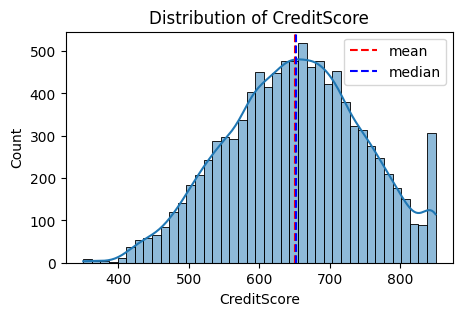

In [33]:
plot_histogram(df,"CreditScore")

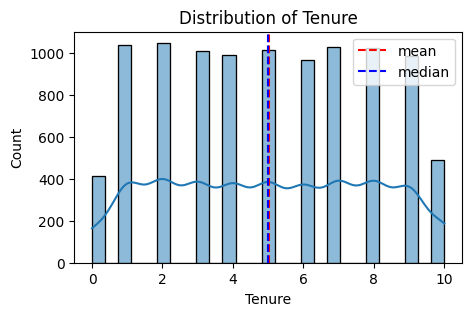

In [34]:
plot_histogram(df,"Tenure")

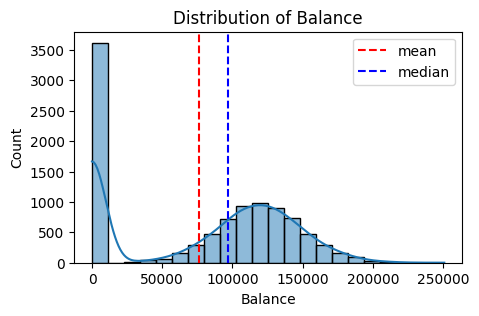

In [35]:
plot_histogram(df,"Balance")

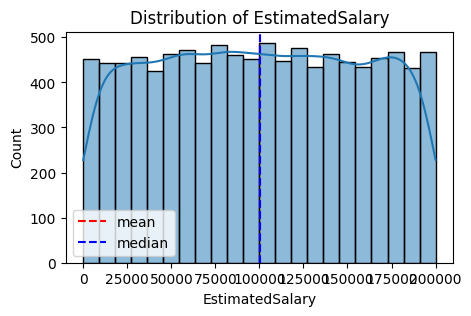

In [36]:
plot_histogram(df,"EstimatedSalary")

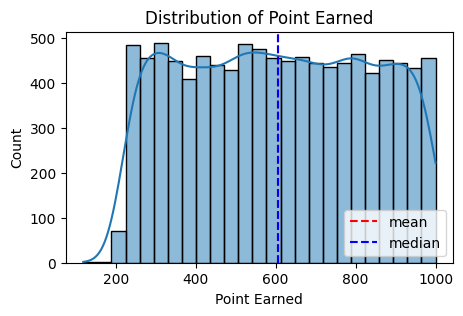

In [37]:
plot_histogram(df,"Point Earned")

Box plot for numerical features/ outliers

In [40]:
def plot_boxplot(df,column_name):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[column_name])
    plt.title(f" Box plot of {column_name}")
    plt.ylabel(column_name)
    plt.show

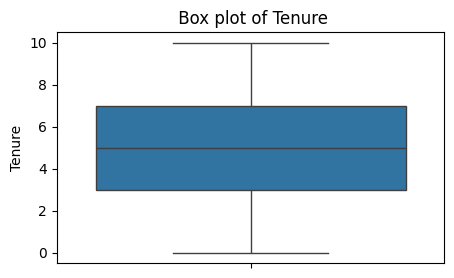

In [41]:
plot_boxplot(df,"Tenure")

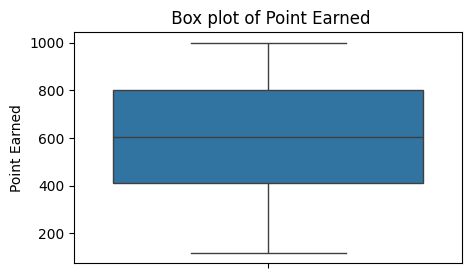

In [42]:
plot_boxplot(df,"Point Earned")

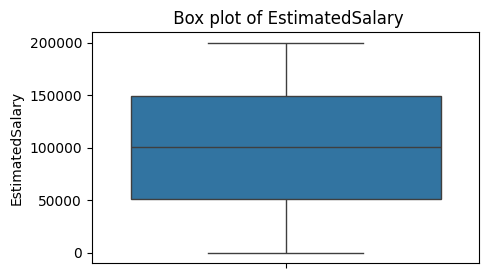

In [43]:
plot_boxplot(df,"EstimatedSalary")

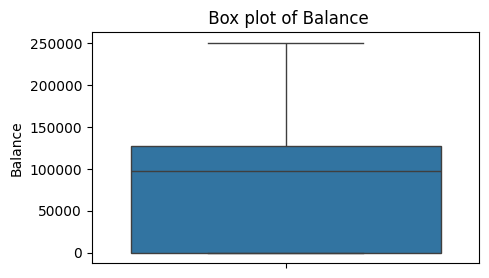

In [44]:
plot_boxplot(df,"Balance")

Correlation Heatmap for numerical columns

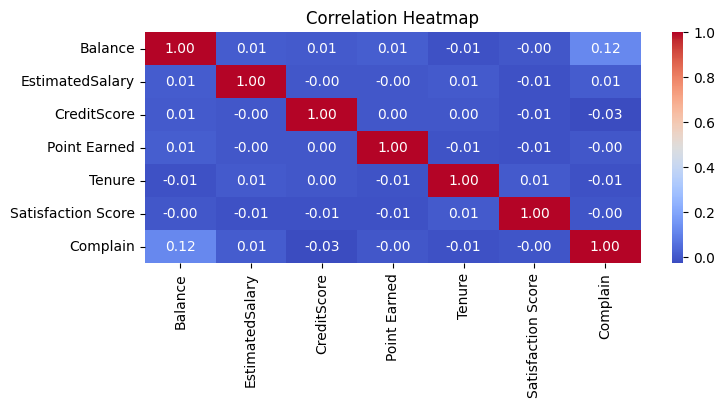

In [49]:
plt.figure(figsize=(8,3))
sns.heatmap(df[["Balance","EstimatedSalary","CreditScore","Point Earned","Tenure","Satisfaction Score","Complain"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
C	Age		NumOfProducts	HasCrCard	IsActiveMember		Exited	Complain	Satisfaction Score	Point Earned

In [10]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Exited']),
                                               df['Exited'],test_size=0.2,
                                               random_state=42)


In [11]:
# OneHotEncoding the Sex columns
rf1=ColumnTransformer(transformers=[
    ('ohe_sex',OneHotEncoder(sparse_output=False,drop='first'),[1]),
    ('ohe_cardType',OrdinalEncoder(categories=[['PLATINUM','DIAMOND', 'GOLD', 'SILVER']]),['Card Type']),
],remainder='passthrough')
     

NameError: name 'ColumnTransformer' is not defined

In [ ]:
rf1.fit_transform(X_train)
rf1.transform(X_test)

In [ ]:
X_train_trs=pd.DataFrame(rf1.transform(X_train),columns=X_train.columns)
X_test_trs=pd.DataFrame(rf1.transform(X_test),columns=X_test.columns)

In [ ]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train_trs,y_train)    

In [ ]:
y_pred=clf.predict(X_test_trs)

In [ ]:
from sklearn.metrics import accuracy_score
print("DECISION",accuracy_score(y_test,y_pred))